In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sympy.matrices import Matrix

## ДЗ с плохо обусловленной матрицей


In [ ]:
arr = np.array([[1, 5], [15, 75.01]])
inverse_array = LA.inv(arr)

In [ ]:
arr

array([[ 1.  ,  5.  ],
       [15.  , 75.01]])

In [ ]:
inverse_array

array([[ 7501.,  -500.],
       [-1500.,   100.]])

In [ ]:
mu = LA.norm(arr, ord=2) * LA.norm(inverse_array, ord=2)

In [ ]:
mu

587750.0099983634

In [ ]:
from sympy.matrices import Matrix
from sympy import symbols
from sympy import init_printing
init_printing(use_unicode=True)

In [ ]:
x, y, eps = symbols("x, y, eps")

A = Matrix([[2, 1], [(2-eps), 1]])
b = Matrix([2, 1])

solve = A.solve(b)
solve

⎡   1   ⎤
⎢  ───  ⎥
⎢  eps  ⎥
⎢       ⎥
⎢     2 ⎥
⎢2 - ───⎥
⎣    eps⎦

In [ ]:
A.inv()

⎡   1     -1 ⎤
⎢  ───    ───⎥
⎢  eps    eps⎥
⎢            ⎥
⎢     2    2 ⎥
⎢1 - ───  ───⎥
⎣    eps  eps⎦

In [ ]:
mu = A.norm(2) * A.inv().norm(2)

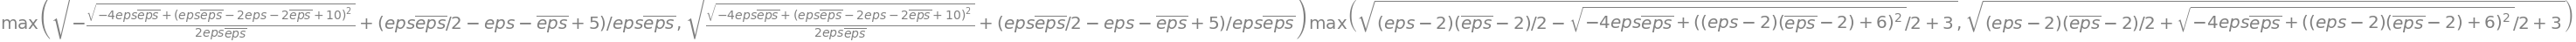

In [ ]:
mu

In [ ]:
print('solve for eps = 0.001')
solve.subs(eps, 0.001)

solve for eps = 0.001


⎡1000.0 ⎤
⎢       ⎥
⎣-1998.0⎦

In [ ]:
mu.subs(eps, 0.001)

In [ ]:
print('solve for eps = 0.005')
solve.subs(eps, 0.005)

solve for eps = 0.005


⎡200.0 ⎤
⎢      ⎥
⎣-398.0⎦

In [ ]:
mu.subs(eps, 0.005)

## 1 Lab. Прямой и обратный ход матрицы LU


In [2]:
A1 = np.array([[3.24, -2.18, 5.09, -2.37, 1.21],
              [0.73, 3.85, -6.23, 4.80, -5.93],
              [2.88, 5.73, -7.02, -9.17, 3.58],
              [2.10, 3.02, -0.78, 3.85, -6.00],
              [1.20, -4.13, 6.48, 0.00, -3.24]])

b1 = np.array([28.38, -36.00, 24.48, -16.23, 4.34])

In [14]:
def forward_substitution(L, b):
    n = len(b)
    y = np.zeros_like(b)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])
    return y


def back_substitution(U, y):
    n = len(y)
    x = np.zeros_like(y)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x


def gauss_lu_decomposition(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()
    for i in range(n):
        for j in range(i+1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j, i:] = U[j, i:] - L[j, i] * U[i, i:]

    return L, U

In [30]:
L, A = gauss_lu_decomposition(A1.copy())
y = forward_substitution(L, b1)
x_solution = back_substitution(A, y)

In [31]:
Matrix(y)

Matrix([
[            28.38],
[-42.3942592592593],
[ 74.1339637692494],
[-163.729923652776],
[ -14.840570822453]])

In [23]:
Matrix(x_solution)

Matrix([
[ 3.03767115431304],
[ 1.80288204522477],
[ 2.91521324548913],
[-1.52539054361548],
[ 3.31786554603917]])

In [24]:
Matrix(L)

Matrix([
[              1.0,                  0,                  0,                  0,   0],
[0.225308641975309,                1.0,                  0,                  0,   0],
[0.888888888888889,   1.76629175138994,                1.0,                  0,   0],
[0.648148148148148,   1.02114408406444,   2.32546753854712,                1.0,   0],
[ 0.37037037037037, -0.765367497547172, -0.707771934508341, -0.175241091556956, 1.0]])

In [25]:
Matrix(A)

Matrix([
[3.24,            -2.18,              5.09,             -2.37,              1.21],
[   0, 4.34117283950617, -7.37682098765432,  5.33398148148148, -6.20262345679012],
[   0,                0,  1.48517361752954, -16.4847008261407,  13.4600870931506],
[   0,                0,                 0,  38.2739841306383, -31.7514826118175],
[   0,                0,                 0,                 0, -4.47292713237567]])

In [26]:
A_lu = L @ A

In [29]:
Matrix(A1)

Matrix([
[3.24, -2.18,  5.09, -2.37,  1.21],
[0.73,  3.85, -6.23,   4.8, -5.93],
[2.88,  5.73, -7.02, -9.17,  3.58],
[ 2.1,  3.02, -0.78,  3.85,  -6.0],
[ 1.2, -4.13,  6.48,     0, -3.24]])

In [27]:
Matrix(A_lu)

Matrix([
[3.24, -2.18,  5.09,                 -2.37,  1.21],
[0.73,  3.85, -6.23,                   4.8, -5.93],
[2.88,  5.73, -7.02,                 -9.17,  3.58],
[ 2.1,  3.02, -0.78,                  3.85,  -6.0],
[ 1.2, -4.13,  6.48, -1.29644586013406e-15, -3.24]])

In [37]:
A = np.zeros((50, 50))
b = np.zeros(50)

for i in range(50):
    for j in range(50):
        A[i, j] = 1 / (i + j + 1)

for i in range(5):
    b[i] = sum(A[i, :])

In [38]:
L, A = gauss_lu_decomposition(A.copy())
y = forward_substitution(L, b)
x_solution = back_substitution(A, y)

In [39]:
Matrix(x_solution)

Matrix([
[     29292002.3312366],
[    -2799902026.26947],
[     46727449958.9458],
[     171468658898.922],
[    -9268935458723.92],
[     82623709603398.4],
[   -329218065626413.0],
[    541646918236938.0],
[    315695811939650.0],
[-2.62443709574085e+15],
[ 3.62350436030444e+15],
[ -1.4984899983731e+15],
[    711270529619575.0],
[-2.68936726304628e+15],
[ 1.46201200519003e+15],
[    389611199271515.0],
[ 3.29514746364074e+15],
[-4.28562980874195e+15],
[-2.08857159601226e+15],
[ 3.68721320707619e+15],
[ 1.94777677178207e+15],
[-1.47125258969471e+15],
[-2.01979794743475e+15],
[ -1.3838121273333e+15],
[ 1.10710317947135e+15],
[    2.21004624939e+15],
[ 1.49080713659292e+15],
[-3.76910607603162e+15],
[    333926859201038.0],
[ 2.11000129297358e+15],
[    601717022926660.0],
[   -286178507745796.0],
[ -5.5528451500516e+15],
[ 5.42941120079548e+15],
[-1.84470922194901e+15],
[    981665199889974.0],
[-1.68218003092253e+15],
[    166655837111415.0],
[   3.243991016765e+15],
[ -2.86694592607

## Lab 2. Метод квадратного корня


In [69]:
A2 = np.array([[2, -1, 4, -3, 1],
               [-1, 1, 2, 1, 3],
               [4, 2, 3, 3, -1],
               [-3, 1, 3, 2, 4],
               [1, 3, -1, 4, 4]])

b2 = np.array([11, 14, 4, 16, 18])

In [49]:
LA.solve(A2, b2)

array([ 1.,  2.,  1., -1.,  4.])

In [71]:
# Let's try to apply the Cholesky decomposition allowing for complex numbers

# Initialize W as a complex matrix
W_complex = np.zeros_like(A2, dtype=np.complex128)

# Step 1: Compute the elements w_ij of the matrix W using complex numbers

for i in range(n):
    for j in range(i+1):
        if i == j:  # Diagonal elements
            W_complex[i, i] = np.sqrt(A2[i, i] - np.sum(W_complex[i, :i] ** 2))
        else:
            W_complex[i, j] = (
                A2[i, j] - np.sum(W_complex[i, :j] * W_complex[j, :j])) / W_complex[j, j]


y_complex = np.zeros(n, dtype=np.complex128)
for i in range(n):
    y_complex[i] = (b2[i] - np.sum(W_complex[i, :i] *
                    y_complex[:i])) / W_complex[i, i]


x_complex = np.zeros(n, dtype=np.complex128)
for i in range(n-1, -1, -1):
    x_complex[i] = (y_complex[i] - np.sum(W_complex[i+1:, i]
                    * x_complex[i+1:])) / W_complex[i, i]

Matrix(x_complex)

Matrix([
[0.999999999999989],
[ 2.00000000000003],
[              1.0],
[-1.00000000000001],
[ 3.99999999999999]])

## Lab 3. QR-разложение


In [2]:
A1 = np.array([[3.24, -2.18, 5.09, -2.37, 1.21],
              [0.73, 3.85, -6.23, 4.80, -5.93],
              [2.88, 5.73, -7.02, -9.17, 3.58],
              [2.10, 3.02, -0.78, 3.85, -6.00],
              [1.20, -4.13, 6.48, 0.00, -3.24]])

b1 = np.array([28.38, -36.00, 24.48, -16.23, 4.34])

### QR разложение через готовый пакет


In [6]:
A1 = np.array([[5 ,-2],
            [-2,2]])

In [7]:
res = LA.qr(A1)

In [9]:
print(res.Q)
print()
print(res.R)

[[-0.92847669  0.37139068]
 [ 0.37139068  0.92847669]]

[[-5.38516481  2.59973473]
 [ 0.          1.11417203]]


In [10]:
LA.eigvals(A1)

array([6., 1.])

### QR-разложение


In [4]:

def qr_decomposition_reflection(A):
    """
    QR-разложение матрицы A с использованием метода отражений.
    """
    m, n = A.shape
    R = A.copy()
    Q = np.eye(m)

    for k in range(n - 1):
        # Формируем вектор нормали p^(k)
        p = R[k:, k].copy()
        p[0] += np.sign(p[0]) * LA.norm(R[k:, k])

        # Нормируем вектор p
        p /= LA.norm(p)

        # Создаем матрицу P_k
        P = np.eye(m)
        P[k:, k:] -= 2 * np.outer(p, p)

        # Обновляем R и Q
        R = P @ R
        Q = Q @ P.T  # P.T, так как Q накапливает транспонированные отражения

    return Q, R


Q, R = qr_decomposition_reflection(A1)

In [5]:
Matrix(Q)

Matrix([
[ -0.64574512047919,  0.466333196107967, -0.132828995226255, 0.0800416010533302, -0.584376924350242],
[-0.145491956157348, -0.409411311900455, -0.449193250688834,  0.779485171650483, 0.0429273699878301],
[-0.573995662648169, -0.494203756443828, -0.282272926711543, -0.542030751459848,  0.229817940325535],
[ -0.41853850401429, -0.223105426377534,  0.826043099344571,  0.273333238717439,  0.134131383411298],
[-0.239164859436737,  0.566482430207139, -0.136222885132036,  0.132241500150081,   0.76541056791867]])

In [6]:
Matrix(R)

Matrix([
[    -5.01745951652826,      -2.7176502281846,     0.425693519392438,      4.4842215320091,  1.31263640061358],
[-1.85424731283536e-16,     -8.43797826717089,      12.2384071918818,    0.602508583138333, 0.726052283185506],
[ 1.20712175559927e-16, -6.34735478615552e-16,      2.57689239846047,     3.92738578580127, -3.02244063350594],
[ 4.53260071807744e-17,  5.21807744966099e-16, -7.85225593801361e-16,     9.57458518937487, -8.53442871362999],
[ 1.72959195149408e-16,   5.5367862585744e-16,  3.13245253912558e-16, 1.60825899197185e-16, -3.42362569665048]])

### Проверка матрицы Q на ортогональность


In [9]:
Matrix(Q @ Q.T)

Matrix([
[                  1.0, -2.54927901331614e-16,  1.63183309126596e-16, -1.23841555693671e-16,  2.43248289147499e-17],
[-2.54927901331614e-16,                   1.0,  5.10338407266956e-16, -1.53060047668866e-16,  7.37156005285261e-17],
[ 1.63183309126596e-16,  5.10338407266956e-16,     0.999999999999999,   5.1669794466373e-16, -1.23319151752306e-16],
[-1.23841555693671e-16, -1.53060047668866e-16,   5.1669794466373e-16,                   1.0,  1.33564338098537e-16],
[ 2.43248289147499e-17,  7.37156005285261e-17, -1.23319151752306e-16,  1.33564338098537e-16,                   1.0]])

Получили единичную матрицу


### Решение СЛАУ методом отражения


In [13]:
def back_substitution(A, y):
    n = len(y)
    x = np.zeros_like(y)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

In [15]:
g = Q.T @ b1

x = back_substitution(R, g)

In [17]:
print('Решение:')
Matrix(x)

Решение:


Matrix([
[ 3.03767115431304],
[ 1.80288204522476],
[ 2.91521324548912],
[-1.52539054361549],
[ 3.31786554603917]])

## Lab 4. Окаймление матрицы


In [3]:
A = np.array([[8.301, 2.625, 4.100, 1.903],
              [3.926, 8.458, 7.787, 2.460],
              [3.773, 7.211, 8.041, 2.280],
              [2.211, 3.657, 1.697, 6.993]])

In [6]:
def get_inv(A):
    n = len(A)
    k = n - 1

    if n == 1:
        return np.matrix([[1 / A[0, 0]]])

    Ap = A[:k, :k]
    V, U = A[k, :k], A[:k, k].reshape(-1, 1)

    Ap_inv = get_inv(Ap)

    alpha = 1 / (A[k, k] - V * Ap_inv * U).item()
    Q = -V * Ap_inv * alpha
    P = Ap_inv - Ap_inv * U * Q
    R = - Ap_inv * U * alpha

    A_inv = np.matrix([[0.0] * n for _ in range(n)])
    A_inv[:k, :k] = P
    A_inv[k, :k] = Q[0]

    A_inv[:k, k] = R[:, 0]
    A_inv[k, k] = alpha

    return A_inv


print("Обратная матрица методом окаймления: ")
print(get_inv(A))
print()
print("Обратная матрица встроенными функциями: ")
print(LA.linalg.inv(A))

Обратная матрица методом окаймления: 
[[ 0.15579918  0.14488059 -0.21482185 -0.02332307]
 [-0.0243331   0.69568738 -0.6562065  -0.02415762]
 [-0.04394744 -0.61825405  0.74858056 -0.01461844]
 [-0.02586973 -0.25958567  0.22942615  0.16655502]]

Обратная матрица встроенными функциями: 
[[ 0.15579918  0.14488059 -0.21482185 -0.02332307]
 [-0.0243331   0.69568738 -0.6562065  -0.02415762]
 [-0.04394744 -0.61825405  0.74858056 -0.01461844]
 [-0.02586973 -0.25958567  0.22942615  0.16655502]]


In [7]:
A_inv = get_inv(A)

In [8]:
print(A_inv @ A)

[[ 1.00000000e+00 -3.71227572e-16 -3.50406825e-16 -3.81265165e-17]
 [-1.78543868e-16  1.00000000e+00  3.56321662e-16  5.73713252e-17]
 [ 2.63852275e-16 -2.57413029e-16  1.00000000e+00 -2.54406474e-16]
 [ 4.76810793e-16  9.07095297e-16  8.27525347e-16  1.00000000e+00]]


## Lab 5. Итерационные методы


#### 4 Вариант

In [2]:
A = [
    [0.79, -0.12, 0.34, 0.16],
    [-0.34, 1.08, -0.17, 0.18],
    [-0.16, -0.34, 0.85, 0.31],
    [-0.12, 0.26, 0.08, 0.75]
]

B = [-0.6400, 1.4200, -0.4200, 0.8300]

LA.solve(A, B)

array([-0.60138097,  0.92076482, -0.51099342,  0.7457532 ])

### Метод простой итерации


In [3]:
import numpy as np

A = [
    [0.79, -0.12, 0.34, 0.16],
    [-0.34, 1.08, -0.17, 0.18],
    [-0.16, -0.34, 0.85, 0.31],
    [-0.12, 0.26, 0.08, 0.75]
]

B = [-0.6400, 1.4200, -0.4200, 0.8300]


eps = .001
x = []
n = len(A)
for j in range(n):
    k = A[j][j]
    for i in range(n):
        A[j][i] /= -k
    A[j][j] = 0
    B[j] /= k


x = B.copy()
tmp = sum(x) + 2*eps
while abs(sum(x)-tmp) > eps:
    tmp = sum(x)
    t = [0]*n
    for i in range(n):
        t[i] = sum(x[j]*A[i][j] for j in range(n)) + B[i]
    x = t.copy()
    # print(x)


print(*(round(elem, 3) for elem in x))

-0.601 0.921 -0.511 0.746


In [1]:
import numpy as np
import pandas as pd

# Define matrix A and vector b
A = np.array([
    [0.79, -0.12, 0.34, 0.16],
    [-0.34, 1.08, -0.17, 0.18],
    [-0.16, -0.34, 0.85, 0.31],
    [-0.12, 0.26, 0.08, 0.75]
])
b = np.array([-0.6400, 1.4200, -0.4200, 0.8300])

def calculate_iterations_with_solution(tau, eps):
    E = np.eye(A.shape[0])  
    B = E - tau * A
    c = tau * b

    x = np.zeros_like(b)
    iterations = 0

    while True:
        x_new = np.dot(B, x) + c
        iterations += 1
        if np.linalg.norm(x_new - x) < eps:
            break
        x = x_new

    return iterations, x_new

taus = np.linspace(0.1, 1.0, 10)  # Tau values
epsilons = [10**(-i) for i in range(1, 10)]

# Recalculate results with solutions
results_with_solutions = []
for tau in taus:
    for eps in epsilons:
        iters, solution = calculate_iterations_with_solution(tau, eps)
        results_with_solutions.append({'tau': tau, 'epsilon': eps, 'iterations': iters, 'solution': solution.tolist()})

# Convert to DataFrame
results_with_solutions_df = pd.DataFrame(results_with_solutions)

results_with_solutions_numeric = results_with_solutions_df.drop(columns=['solution'])

# Group by tau
results_by_tau = results_with_solutions_numeric.groupby(['tau']).mean().reset_index()

# Group by epsilon
results_by_eps = results_with_solutions_numeric.groupby(['epsilon']).mean().reset_index()



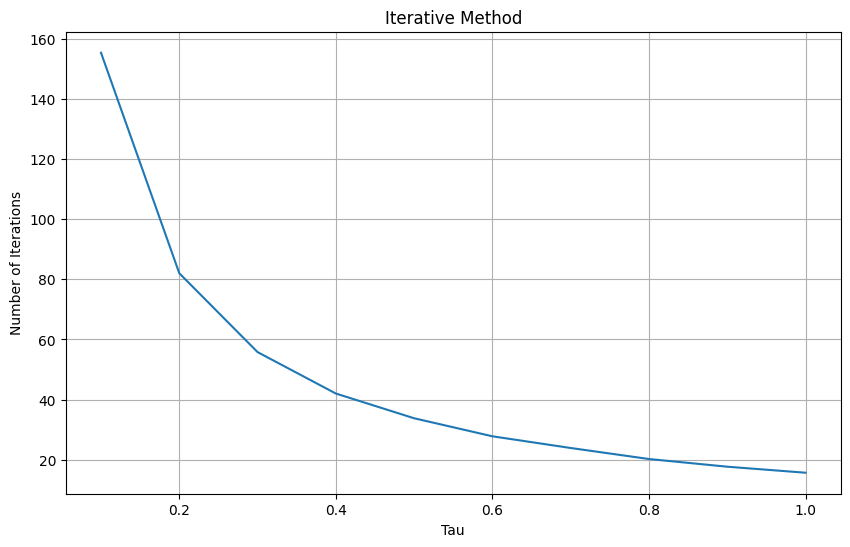

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting the plot size and creating the seaborn plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_by_tau, x='tau', y='iterations')
plt.xlabel('Tau')
plt.ylabel('Number of Iterations')
plt.title('Iterative Method')
plt.grid()
plt.show()


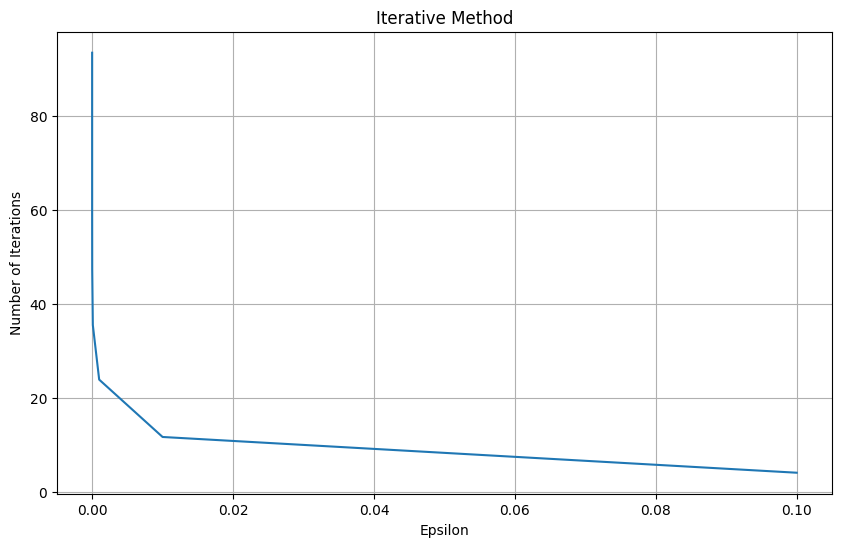

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.lineplot(data=results_by_eps, x='epsilon', y='iterations')
plt.xlabel('Epsilon')
plt.ylabel('Number of Iterations')
plt.title('Iterative Method')
plt.grid()
plt.show()


### Метод Якоби


In [9]:
from numpy import zeros, diag, diagflat, dot


def jacobi(A, b, N=25, x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed
    if x is None:
        x = zeros(len(A[0]))

    # Create a vector of the diagonal elements of A
    # and subtract them from A
    D = diag(A)
    R = A - diagflat(D)

    # Iterate for N times
    for i in range(N):
        x = (b - dot(R, x)) / D
    return x

A = [
    [0.79, -0.12, 0.34, 0.16],
    [-0.34, 1.08, -0.17, 0.18],
    [-0.16, -0.34, 0.85, 0.31],
    [-0.12, 0.26, 0.08, 0.75]
]

b = [-0.6400, 1.4200, -0.4200, 0.8300]

sol = jacobi(A, b, N=25)

print(sol)

[-0.60138097  0.92076482 -0.51099342  0.7457532 ]


Solutions:
[-0.61069813  0.92231796 -0.51375378  0.74126416]
[-0.60164471  0.92186787 -0.51096939  0.74698077]
[-0.60131342  0.9207984  -0.51096838  0.74584296]
[-0.60140483  0.92077507 -0.51100001  0.7457497 ]
[-0.60138134  0.9207642  -0.51099359  0.74575215]
[-0.60138103  0.92076487 -0.51099344  0.74575322]
[-0.60138096  0.9207648  -0.51099342  0.74575318]
[-0.60138097  0.92076482 -0.51099342  0.7457532 ]
[-0.60138097  0.92076482 -0.51099342  0.7457532 ]


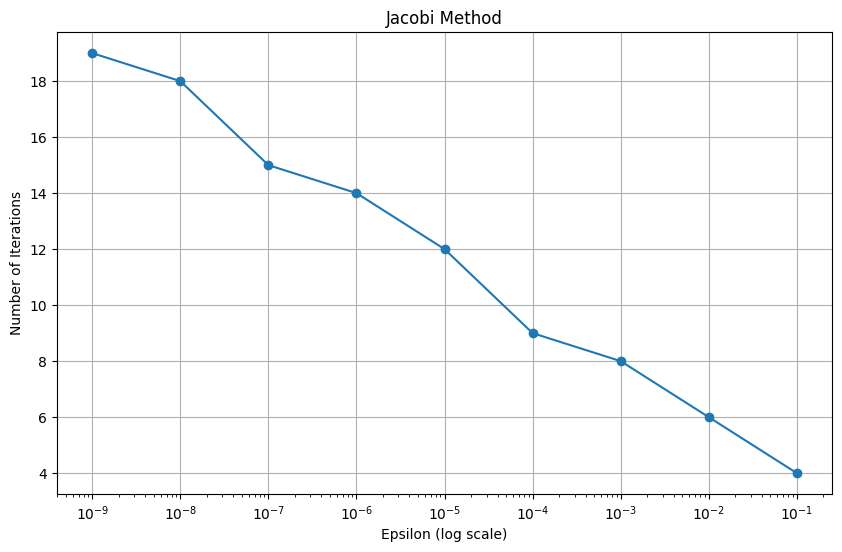

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_method(A, B, epsilon=1e-6, max_iterations=1000):
    """
    Solves the system of linear equations Ax = B using the Jacobi method.
    Returns the solution vector x and the number of iterations.
    """
    A = np.array(A)
    B = np.array(B)
    n = len(B)
    x = np.zeros_like(B)  # Initial guess
    x_prev = np.zeros_like(B)
    iteration = 0
    
    while True:
        iteration += 1
        for i in range(n):
            s = sum(A[i][j] * x_prev[j] for j in range(n) if j != i)
            x[i] = (B[i] - s) / A[i][i]
        
        # Convergence check
        if np.linalg.norm(x - x_prev, ord=np.inf) < epsilon or iteration >= max_iterations:
            break
        
        x_prev = np.copy(x)
    
    return x, iteration

# Parameters for testing
epsilons = [10**(-i) for i in range(1, 10)]
iterations = []

A = [
    [0.79, -0.12, 0.34, 0.16],
    [-0.34, 1.08, -0.17, 0.18],
    [-0.16, -0.34, 0.85, 0.31],
    [-0.12, 0.26, 0.08, 0.75]
]

B = [-0.6400, 1.4200, -0.4200, 0.8300]


# Run the method for different epsilons and collect the iterations
print("Solutions:")
for eps in epsilons:
    _, iters = jacobi_method(A, B, epsilon=eps)
    print(_)
    iterations.append(iters)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(epsilons, iterations, marker='o')
plt.xscale('log')
plt.xlabel('Epsilon (log scale)')
plt.ylabel('Number of Iterations')
plt.title('Jacobi Method')
plt.grid()
plt.show()


### Метод Зейделя


Solutions
[-0.60708164  0.93060902 -0.49692525  0.73992784]
[-0.60175557  0.92126899 -0.51030594  0.74544516]
[-0.60153788  0.92087498 -0.51086655  0.74567638]
[-0.60138848  0.92077052 -0.51098667  0.74574931]
[-0.60138223  0.92076614 -0.51099171  0.74575236]
[-0.60138104  0.92076489 -0.51099334  0.74575316]
[-0.60138098  0.92076483 -0.51099342  0.7457532 ]
[-0.60138098  0.92076483 -0.51099342  0.7457532 ]
[-0.60138097  0.92076482 -0.51099342  0.7457532 ]


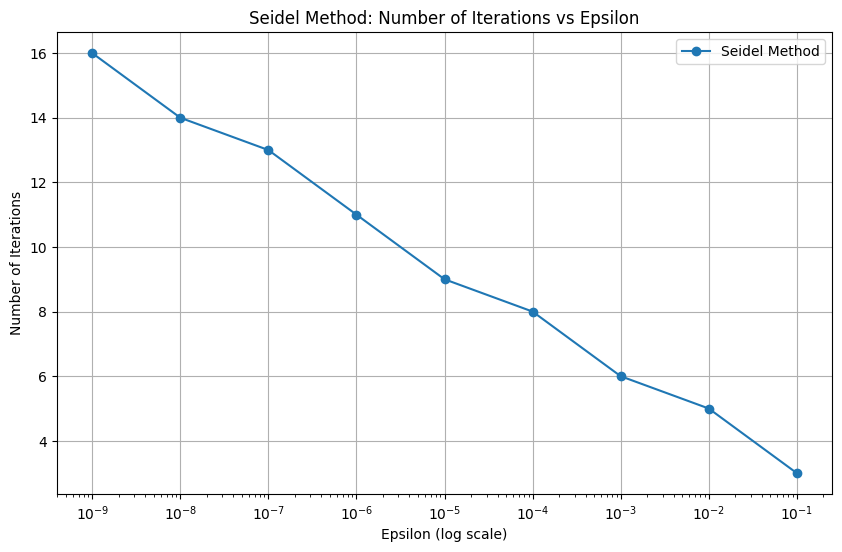

In [15]:
def seidel_method(A, b, eps=1e-6, max_iterations=1000):
    """
    Solves the system of linear equations Ax = b using the Gauss-Seidel method.
    Returns the solution vector x and the number of iterations.
    """
    A = np.array(A)
    b = np.array(b)
    n = len(A)
    x = np.zeros(n)
    iteration = 0
    converge = False

    while not converge and iteration < max_iterations:
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        converge = np.sqrt(sum((x_new[i] - x[i]) ** 2 for i in range(n))) <= eps
        x = x_new
        iteration += 1

    return x, iteration

iterations_seidel = []
epsilons = [10**(-i) for i in range(1, 10)]

print("Solutions")
for eps in epsilons:
    _, iters = seidel_method(A, B, eps=eps)
    print(_)
    iterations_seidel.append(iters)

plt.figure(figsize=(10, 6))
plt.plot(epsilons, iterations_seidel, marker='o', label='Seidel Method')
plt.xscale('log')
plt.xlabel('Epsilon (log scale)')
plt.ylabel('Number of Iterations')
plt.title('Seidel Method: Number of Iterations vs Epsilon')
plt.grid()
plt.legend()
plt.show()


### Метод Релаксации

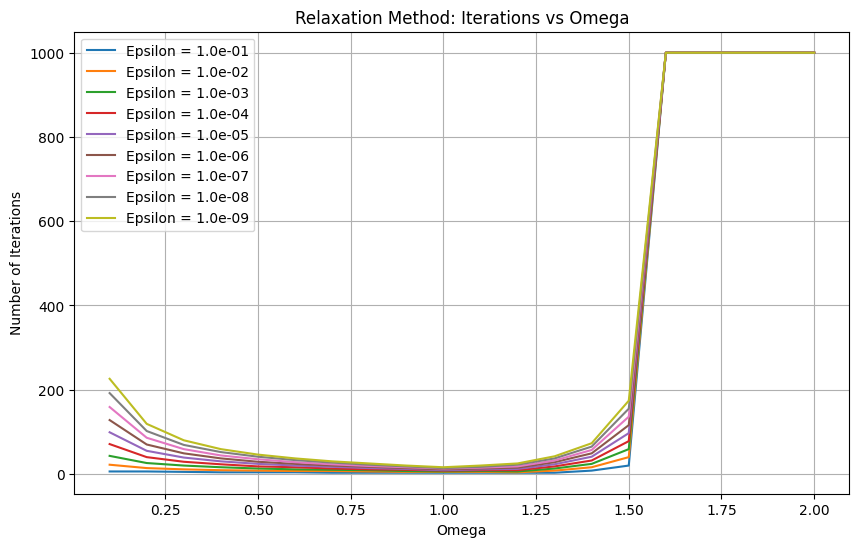

In [16]:
def relaxation_method(A, b, eps=1e-6, omega=1.0, max_iterations=1000):
    """
    Solves the system of linear equations Ax = b using the Successive Over-Relaxation (SOR) method.
    Returns the solution vector x and the number of iterations.
    """
    A = np.array(A)
    b = np.array(b)
    n = len(A)
    x = np.zeros(n)
    iteration = 0
    converge = False

    while not converge and iteration < max_iterations:
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (1 - omega) * x[i] + omega * (b[i] - s1 - s2) / A[i][i]

        converge = np.sqrt(sum((x_new[i] - x[i]) ** 2 for i in range(n))) <= eps
        x = x_new
        iteration += 1

    return x, iteration

# Parameters for testing
iterations_relaxation = []
omega_values = np.linspace(0.1, 2.0, 20)

# Calculate number of iterations for different epsilons and omega values
for eps in epsilons:
    iters_for_eps = []
    for omega in omega_values:
        _, iters = relaxation_method(A, B, eps=eps, omega=omega)
        iters_for_eps.append(iters)
    iterations_relaxation.append(iters_for_eps)

# Plotting the results
# Graph 1: Number of iterations vs Epsilon for fixed omega (e.g., omega = 1.0)
plt.figure(figsize=(10, 6))
for i, eps in enumerate(epsilons):
    plt.plot(omega_values, iterations_relaxation[i], label=f"Epsilon = {eps:.1e}")
plt.xlabel('Omega')
plt.ylabel('Number of Iterations')
plt.title('Relaxation Method: Iterations vs Omega')
plt.grid()
plt.legend()
plt.show()


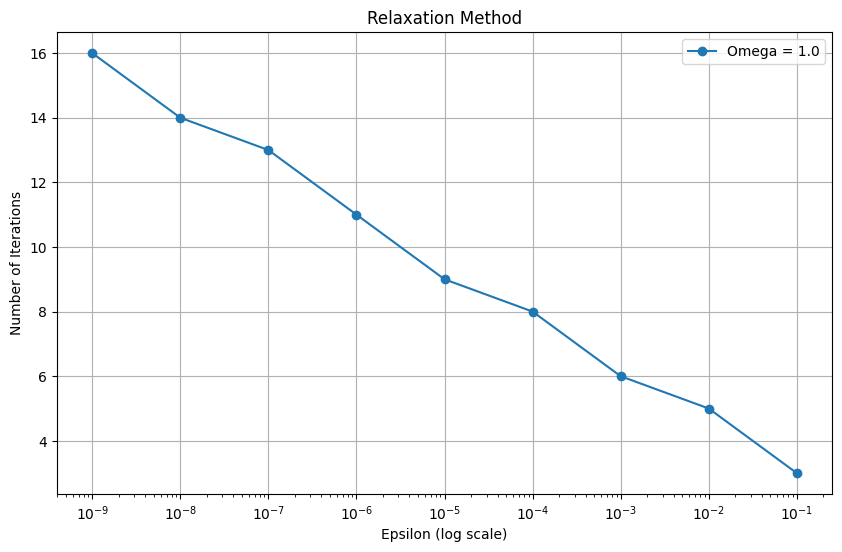

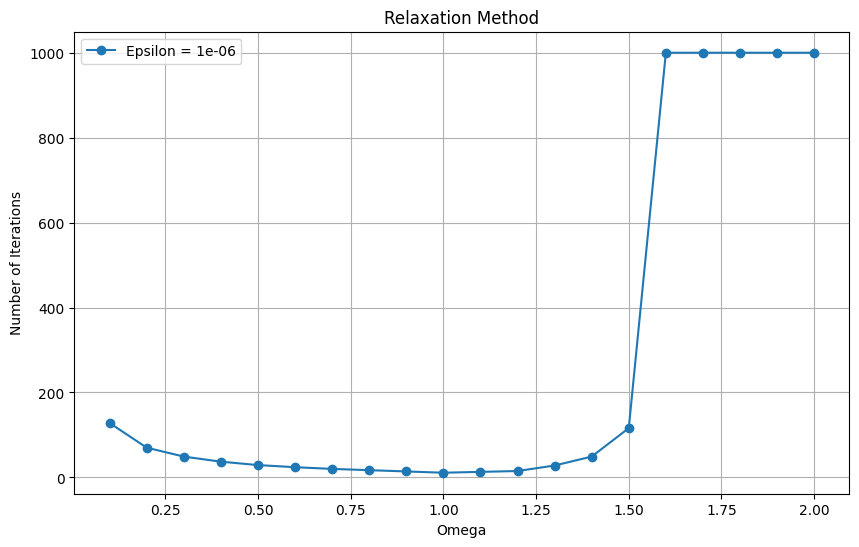

In [18]:
# Plotting the results for epsilon separately (Number of Iterations vs Epsilon for a fixed omega)
fixed_omega = 1.0  # Choose a typical omega value

# Extract iterations for fixed omega
iterations_for_fixed_omega = [
    relaxation_method(A, B, eps=eps, omega=fixed_omega)[1] for eps in epsilons
]

plt.figure(figsize=(10, 6))
plt.plot(epsilons, iterations_for_fixed_omega, marker='o', label=f"Omega = {fixed_omega}")
plt.xscale('log')
plt.xlabel('Epsilon (log scale)')
plt.ylabel('Number of Iterations')
plt.title('Relaxation Method')
plt.grid()
plt.legend()
plt.show()

# Plotting the results for omega separately (Number of Iterations vs Omega for a fixed epsilon)
fixed_epsilon = 1e-6  # Choose a typical epsilon value

# Extract iterations for fixed epsilon
iterations_for_fixed_epsilon = [
    relaxation_method(A, B, eps=fixed_epsilon, omega=omega)[1] for omega in omega_values
]

plt.figure(figsize=(10, 6))
plt.plot(omega_values, iterations_for_fixed_epsilon, marker='o', label=f"Epsilon = {fixed_epsilon}")
plt.xlabel('Omega')
plt.ylabel('Number of Iterations')
plt.title('Relaxation Method')
plt.grid()
plt.legend()
plt.show()


## Проблема собственных значений

### Метод вращений

In [21]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt

alpha = 0.75
beta = 0

A = np.array([
    [5.18 + alpha, 1.12, 0.95, 1.32, 0.83],
    [1.12, 4.28 - alpha, 2.12, 0.57, 0.91],
    [0.95, 2.12, 6.13 + alpha, 1.29, 1.57],
    [1.32, 0.57, 1.29, 4.57 - alpha, 1.25],
    [0.83, 0.91, 1.57, 1.25, 5.21 + alpha]
])

b = np.array([
    [6.19 + beta],
    [3.21],
    [4.28 - beta],
    [6.25],
    [4.95 + beta]
])

A, b


(array([[5.93, 1.12, 0.95, 1.32, 0.83],
        [1.12, 3.53, 2.12, 0.57, 0.91],
        [0.95, 2.12, 6.88, 1.29, 1.57],
        [1.32, 0.57, 1.29, 3.82, 1.25],
        [0.83, 0.91, 1.57, 1.25, 5.96]]),
 array([[6.19],
        [3.21],
        [4.28],
        [6.25],
        [4.95]]))

In [13]:
def jacobi_eigenvalue_method(A, eps=1e-10, max_iterations=100):
    n = A.shape[0]
    V = np.eye(n) 
    iterations = 0
    
    while iterations < max_iterations:
        off_diag_sum = np.sum(A**2) - np.sum(np.diag(A)**2)
        
        if off_diag_sum < eps**2:
            break
        
        max_val = 0
        p, q = 0, 0
        for i in range(n):
            for j in range(i + 1, n):
                if abs(A[i, j]) > max_val:
                    max_val = abs(A[i, j])
                    p, q = i, j
        
        if A[p, p] == A[q, q]:
            theta = np.pi / 4
        else:
            theta = 0.5 * np.arctan(2 * A[p, q] / (A[p, p] - A[q, q]))
        
        R = np.eye(n)
        R[p, p] = np.cos(theta)
        R[q, q] = np.cos(theta)
        R[p, q] = -np.sin(theta)
        R[q, p] = np.sin(theta)
        
        A = R.T @ A @ R
        V = V @ R
        iterations += 1
    
    eigenvalues = np.diag(A)
    eigenvectors = V
    return eigenvalues, eigenvectors, iterations


eigenvalues, eigenvectors, iterations = jacobi_eigenvalue_method(A, eps=1e-8)

print(f"Кол-во итераций: {iterations}")

Кол-во итераций: 27


In [9]:
print("Собственные значения:")
Matrix(eigenvalues)

Собственные значения:


Matrix([
[5.44578805223517],
[2.31304067089199],
[10.4226941687886],
[ 3.0260068192485],
[4.91247028883575]])

In [10]:
print("Собственные вектора:")
Matrix(eigenvectors)

Собственные вектора:


Matrix([
[  0.832626306420193,  -0.246547376128058, 0.400447260869899, -0.203082244776655, -0.210588267241334],
[-0.0693263515040503,   0.826534562255044, 0.347889099103587,  -0.38256392389692, -0.211311365625433],
[ -0.512550130863554,  -0.389554425827313, 0.636043747000605, 0.0621075871359506, -0.420868996472402],
[  0.177498699748902,   0.310496442093991, 0.321285365119756,  0.869875603285728,  0.110355425795827],
[-0.0878286159711485, -0.0888499717926612, 0.459172333713591, -0.227731263592657,  0.849524017473045]])

In [24]:
from scipy.linalg import eig

eigenvalues, eigenvectors = eig(A)

eigenvalues, eigenvectors

(array([10.42269417+0.j,  2.31304067+0.j,  3.02600682+0.j,  5.44578805+0.j,
         4.91247029+0.j]),
 array([[ 0.40044726,  0.24654738,  0.20308225, -0.83262631, -0.21058827],
        [ 0.3478891 , -0.82653456,  0.38256392,  0.06932635, -0.21131137],
        [ 0.63604375,  0.38955443, -0.06210759,  0.51255013, -0.420869  ],
        [ 0.32128537, -0.31049644, -0.8698756 , -0.1774987 ,  0.11035543],
        [ 0.45917233,  0.08884997,  0.22773126,  0.08782862,  0.84952402]]))

Solutions


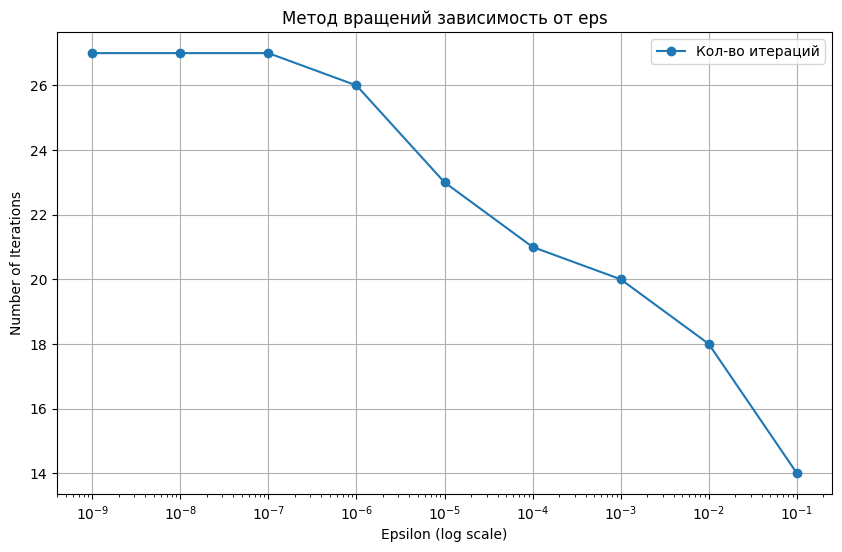

In [23]:
iterations = []
epsilons = [10**(-i) for i in range(1, 10)]

print("Solutions")
for eps in epsilons:
    _, _, iters = jacobi_eigenvalue_method(A, eps=eps)
    iterations.append(iters)


plt.figure(figsize=(10, 6))
plt.plot(epsilons, iterations, marker='o', label='Кол-во итераций')
plt.xscale('log')
plt.xlabel('Epsilon (log scale)')
plt.ylabel('Number of Iterations')
plt.title('Метод вращений зависимость от eps')
plt.grid()
plt.legend()
plt.show()

### Решение частичной проблемы собственных значений

In [5]:
import numpy as np

# Define the matrix A with given alpha
alpha = 0.75

A = np.array([
    [5.18 + alpha, 1.12, 0.95, 1.32, 0.83],
    [1.12, 4.28 - alpha, 2.12, 0.57, 0.91],
    [0.95, 2.12, 6.13 + alpha, 1.29, 1.57],
    [1.32, 0.57, 1.29, 4.57 - alpha, 1.25],
    [0.83, 0.91, 1.57, 1.25, 5.21 + alpha]
])

# Power iteration to find the maximum eigenvalue
def power_iteration(matrix, num_iterations=1000, tol=1e-10):
    b_k = np.random.rand(matrix.shape[1])
    for _ in range(num_iterations):
        b_k1 = np.dot(matrix, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
        if np.linalg.norm(np.dot(matrix, b_k) - b_k1_norm * b_k) < tol:
            break
    # max_eigenvec = b_k / np.linalg.norm(b_k) # СВ 
    print(b_k / np.linalg.norm(b_k))
    print(np.linalg.norm(b_k))
    print(np.dot(b_k.T, b_k))
    max_eigenvalue = np.dot(b_k.T, np.dot(matrix, b_k)) / np.dot(b_k.T, b_k)
    return max_eigenvalue, b_k

# Inverse iteration to find the minimum eigenvalue
def inverse_iteration(matrix, num_iterations=1000, tol=1e-10):
    b_k = np.random.rand(matrix.shape[1])
    matrix_inv = np.linalg.inv(matrix)
    for _ in range(num_iterations):
        b_k1 = np.dot(matrix_inv, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
        if np.linalg.norm(np.dot(matrix_inv, b_k) - b_k1_norm * b_k) < tol:
            break
    min_eigenvalue = np.dot(b_k.T, np.dot(matrix, b_k)) / np.dot(b_k.T, b_k)
    return min_eigenvalue, b_k

# Calculate the maximum and minimum eigenvalues
max_eigenvalue, _ = power_iteration(A)
min_eigenvalue, _ = inverse_iteration(A)

max_eigenvalue, min_eigenvalue


[0.40044726 0.3478891  0.63604375 0.32128537 0.45917233]
1.0
1.0000000000000002


(10.422694168788599, 2.313040670891988)